# Converter from .dmx and .qfc file to .mat

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [ ]:
DMX = 'netgen-1000-1-0-a-a-ns.dmx'
QFC = 'netgen-1000-1-0-a-a-ns.qfc'
MCF = 'MCF_1000.mat'

## Read .dmx which contains the problem definitions: m, n, E, b, u, q


In [ ]:
with open(DMX) as f:
    lines = f.readlines()

In [ ]:
m = 0   #Number of nodes
n = 0   #Number of edges
b = []  #Vector with capacities of nodes
E = []  #Incidence matrix of the graph
u = []  #Right box constraints
q = []

arc_index = 0

for l in lines:
  # p contains the definition of the problem
  if l[0] == 'p':
    w = l.split()

    # w[2] has the number of nodes
    m = int(w[2])

    # w[3] has the number of edges
    n = int(w[3])
    b = np.zeros(m, dtype=float)
    E = np.zeros((m, n), dtype=float)
    u = np.zeros(n, dtype=float)
    q = np.zeros(n, dtype=float)

    # n contains the properties of nodes
  elif l[0] == 'n':
    w = l.split()

    # w[1] is the id of the node, w[2] is the capacity b of the node
    b[int(w[1])-1] = float(w[2])

    # a contains the properties of edges
  elif l[0] == 'a':
     w = l.split()

     # w[1] is the id of the node from where the edge start
     E[int(w[1])-1, arc_index] = -1

     # w[2] is the id of the node where the edge is directed
     E[int(w[2])-1, arc_index] = 1

     # w[4] is the maximum capacity of the edge
     u[arc_index] = float(w[4])

     # w[5] is the linear cost of the objective function q
     q[arc_index] = float(w[5])

     # arc_index is an id for edges
     arc_index = arc_index+1




### Vector b

In [ ]:
b = -b

89 1000
(89,)


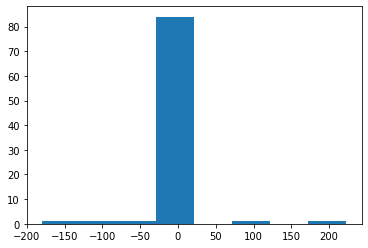

In [ ]:
print(m,n)
print(b.shape)
plt.hist(b, bins='auto')
plt.show()

### Vector u

(1000,)


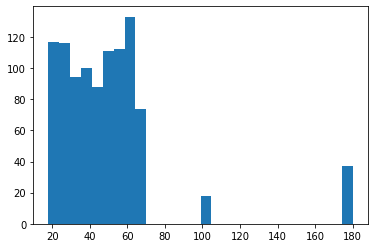

In [ ]:
print(u.shape)
plt.hist(u, bins='auto')
plt.show()

### Incidence matrix E

(89, 1000)


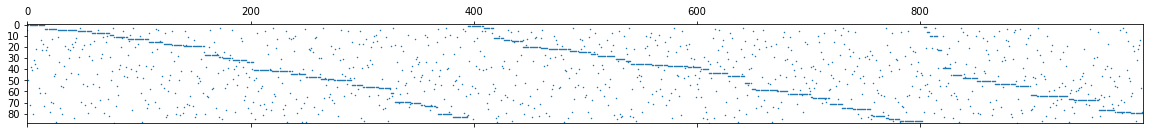

In [ ]:
print(E.shape)
plt.figure(figsize=(20, 20))
plt.spy(E, markersize=0.5)

In [ ]:
# Number of disconnected nodes to check if the graph is connected
disconnected_nodes = 0
for col in E:
  if len(np.nonzero(col)[0]) == 0:
    disconnected_nodes = disconnected_nodes+1

print(disconnected_nodes)

0


## Read .qfc which contains Q for the objective function of the problem

In [ ]:
with open(QFC) as f:
    lines = f.readlines()

In [ ]:
Q = np.array(lines[2].split(), dtype=float)

(1000,)


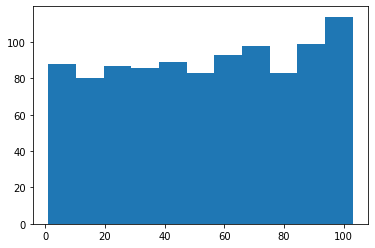

In [ ]:
print(q.shape)
plt.hist(q, bins='auto')
plt.show()

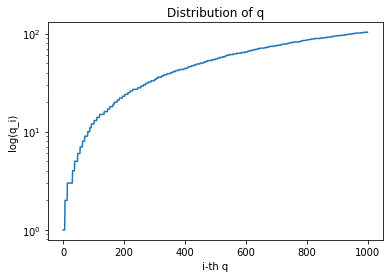

In [ ]:
plt.title('Distribution of q')
plt.xlabel('i-th q')
plt.ylabel('log(q_i)')
plt.yscale('log')
plt.plot(np.sort(q))
plt.show()

(1000,)


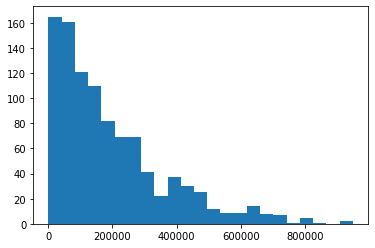

In [ ]:
print(Q.shape)
plt.hist(Q, bins='auto')
plt.show()

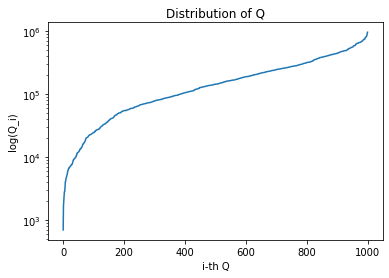

In [ ]:
plt.title('Distribution of Q')
plt.xlabel('i-th Q')
plt.ylabel('log(Q_i)')
plt.yscale('log')
plt.plot(np.sort(Q))
plt.show()

## Save problem .mat

In [ ]:
assert disconnected_nodes == 0, 'check graph G'
assert m == E.shape[0], 'check E shape'
assert n == E.shape[1], 'check E shape'
assert n == u.shape[0], 'check u shape'
assert m == b.shape[0], 'check b shape'
assert n == Q.shape[0], 'check Q shape'
assert n == q.shape[0], 'check q shape'

In [ ]:
io.savemat(MCF, {'E':E, 'u':u, 'b':b, 'Q':Q, 'q':q})